# Solution: CERES data

To solve the following exercises you can copy and paste code from the previous notebook. The code modifications required to solve the exercises are minimal (e.g. changing the name of a variable, add a small computation...): don't think too "complicated"!

## Importing the modules

This one is easy. I'll do it for you:

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## TOA fluxes 

Read the TOA dataset we used during the lesson. Do you remember all variables it contains?

In [2]:
ds = xr.open_dataset('../data/CERES_EBAF-TOA_Ed4.1_Clim-2005-2015.nc')
ds

<xarray.Dataset>
Dimensions:            (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat                (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * month              (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    toa_sw_all_clim    (month, lat, lon) float32 ...
    toa_lw_all_clim    (month, lat, lon) float32 ...
    toa_sw_clr_c_clim  (month, lat, lon) float32 ...
    toa_lw_clr_c_clim  (month, lat, lon) float32 ...
    solar_clim         (month, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

### Albedo 

Compute the climatological mean of clear-sky planetary albedo $\overline{\alpha_{P_{clr}}}$ and plot it on a map. Analyse the plot.

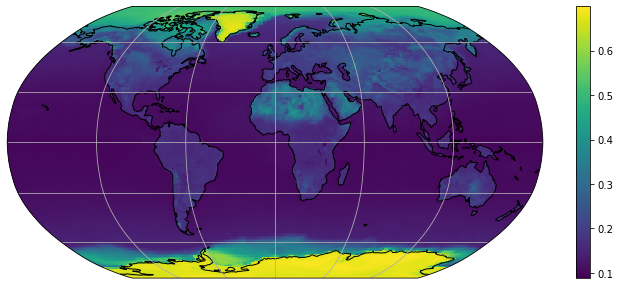

In [3]:
alpha_clr = ds.toa_sw_clr_c_clim.mean(dim='month') / ds.solar_clim.mean(dim='month')
ax = plt.axes(projection=ccrs.Robinson())
alpha_clr.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); 

Repeat the operation with all-sky planetary albedo $\overline{\alpha_{P_{all}}}$. Where are the largest differences? Can you plot the difference between the two on a map, too?

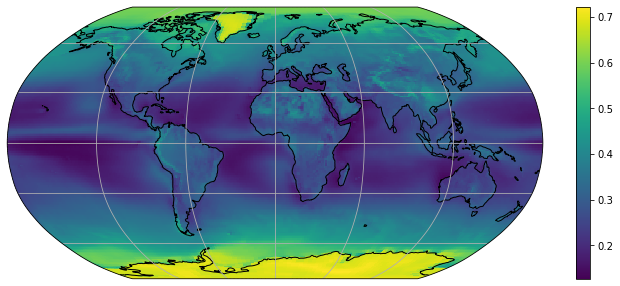

In [4]:
alpha_all = ds.toa_sw_all_clim.mean(dim='month') / ds.solar_clim.mean(dim='month')
ax = plt.axes(projection=ccrs.Robinson())
alpha_all.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); 

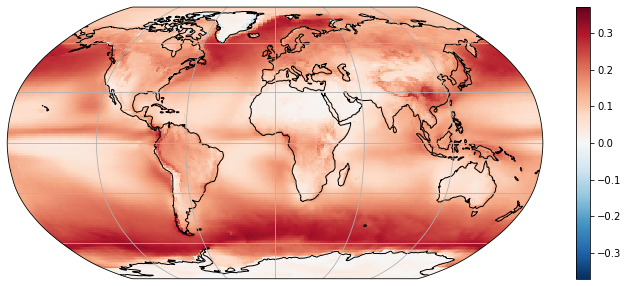

In [5]:
alpha_all = ds.toa_sw_all_clim.mean(dim='month') / ds.solar_clim.mean(dim='month')
ax = plt.axes(projection=ccrs.Robinson())
(alpha_all - alpha_clr).plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); 

Now plot the zonal, climatological means $\left[ \overline{\alpha_{P_{all}}} \right]$ and $\left[ \overline{\alpha_{P_{clr}}} \right]$ on the same plot. Add a legend to it!

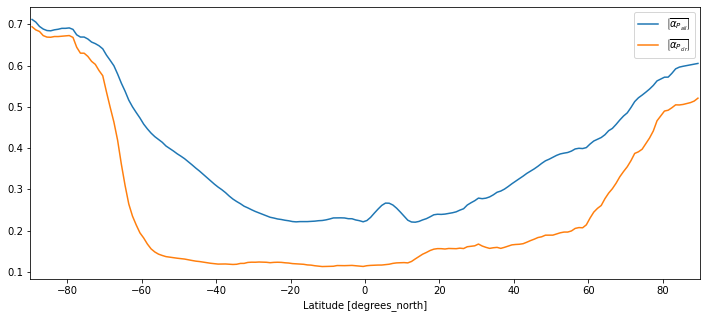

In [6]:
alpha_all.mean(dim='lon').plot(label='$\\left[ \\overline{\\alpha_{P_{all}}} \\right]$')
alpha_clr.mean(dim='lon').plot(label='$\\left[ \\overline{\\alpha_{P_{clr}}} \\right]$')
plt.xlim(-90, 90)
plt.legend();

Compute the global average of $\overline{\alpha_{P_{all}}}$ and $\overline{\alpha_{P_{clr}}}$ (remember to weight according to latitude!). Compare the values you obtain with the ones we mentioned in the lecture.

In [7]:
weight = np.cos(np.deg2rad(ds.lat))
weight = weight / weight.sum()

In [8]:
print('Average All Sky Albedo: {:.2f}'.format(float((alpha_all.mean(dim='lon') * weight).sum())))
print('Average Clr Sky Albedo: {:.2f}'.format(float((alpha_clr.mean(dim='lon') * weight).sum())))

Average All Sky Albedo: 0.31
Average Clr Sky Albedo: 0.17


### Longwave outgoing radiation 

Repeat the operations above with $LW_{all} $ and  $LW_{clr}$ (i.e.: maps of $\overline{LW_{all}}$, $\overline{LW_{clr}}$, line plots of $\left[ \overline{LW_{all}} \right]$, $\left[ \overline{LW_{clr}} \right]$). What is the global effect of clouds on outgoing longwave radiation?

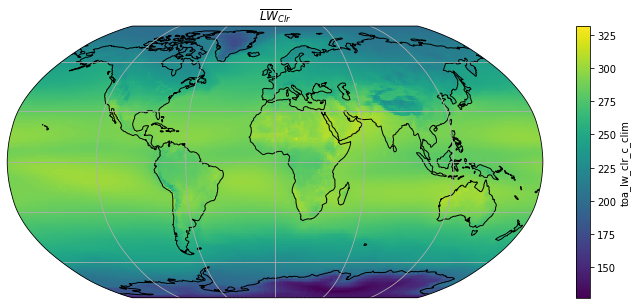

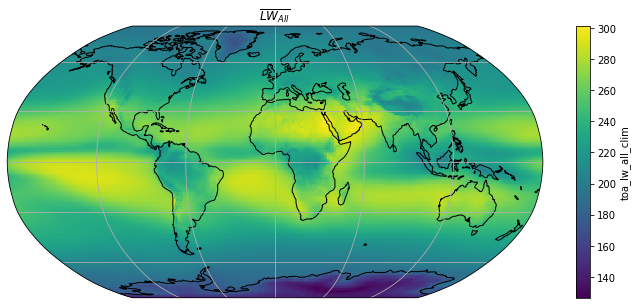

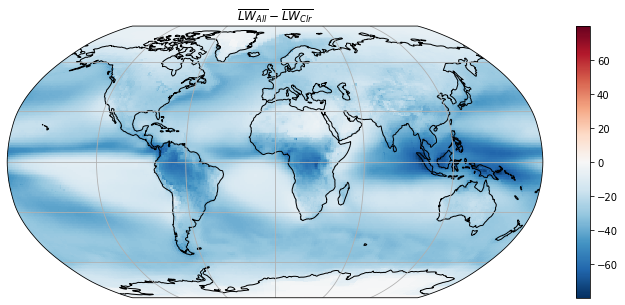

In [9]:
# Map 1
lw_clr = ds.toa_lw_clr_c_clim.mean(dim='month')
ax = plt.axes(projection=ccrs.Robinson())
lw_clr.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); ax.set_title('$\overline{LW_{Clr}}$');
# Map 2
plt.figure();
lw_all = ds.toa_lw_all_clim.mean(dim='month')
ax = plt.axes(projection=ccrs.Robinson())
lw_all.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); ax.set_title('$\overline{LW_{All}}$');
# Diff
plt.figure();
ax = plt.axes(projection=ccrs.Robinson())
(lw_all - lw_clr).plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); ax.set_title('$\overline{LW_{All}} - \overline{LW_{Clr}}$');

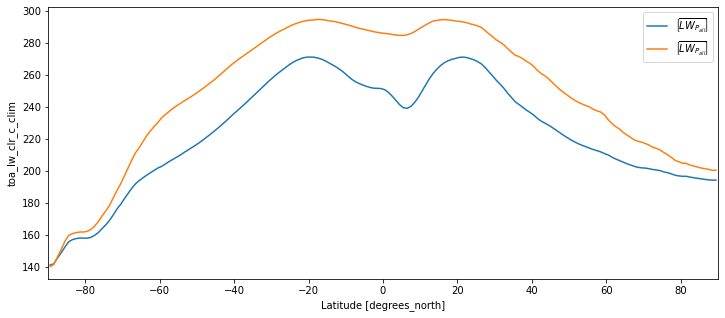

In [10]:
ds.toa_lw_all_clim.mean(dim=['month', 'lon']).plot(label='$\\left[ \\overline{LW_{P_{all}}} \\right]$')
ds.toa_lw_clr_c_clim.mean(dim=['month', 'lon']).plot(label='$\\left[ \\overline{LW_{P_{all}}} \\right]$')
plt.xlim(-90, 90)
plt.legend();

## Surface fluxes 

Now open the EBAF-Surface dataset, available for download [here](https://www.dropbox.com/s/r0armbs8ip4op1f/CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc?dl=1).

In [11]:
ds_surf = xr.open_dataset('../data/CERES_EBAF-Surface_Ed4.1_Clim-2005-2015.nc')
ds_surf

<xarray.Dataset>
Dimensions:                 (lon: 360, lat: 180, month: 12)
Coordinates:
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * month                   (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sfc_sw_down_all_clim    (month, lat, lon) float32 ...
    sfc_sw_down_clr_t_clim  (month, lat, lon) float32 ...
    sfc_sw_up_all_clim      (month, lat, lon) float32 ...
    sfc_sw_up_clr_t_clim    (month, lat, lon) float32 ...
    sfc_lw_down_all_clim    (month, lat, lon) float32 ...
    sfc_lw_down_clr_t_clim  (month, lat, lon) float32 ...
    sfc_lw_up_all_clim      (month, lat, lon) float32 ...
    sfc_lw_up_clr_t_clim    (month, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1

### Surface albedo 

Compute the all-sky surface albedo $\overline{\alpha_{S_{all}}}$. Plot it on a map.

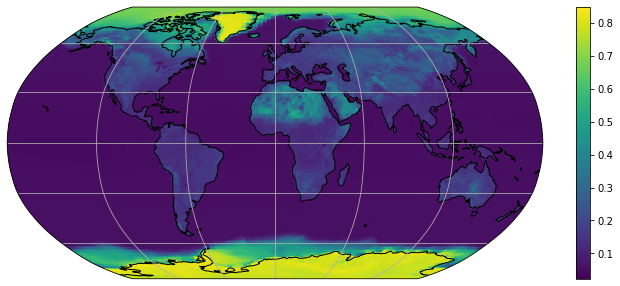

In [12]:
ds_mean = ds_surf.mean(dim='month')  # see what I've done here?
alpha_s =  ds_mean.sfc_sw_up_all_clim / ds_mean.sfc_sw_down_all_clim
# Map
ax = plt.axes(projection=ccrs.Robinson())
alpha_s.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines();

Compute the global average of $\overline{\alpha_{s}}$.

In [13]:
print('Average All Sky Surface Albedo: {:.2f}'.format(float((alpha_s.mean(dim='lon') * weight).sum())))

Average All Sky Surface Albedo: 0.14


### Surface energy balance

Now compute the net surface energy intake $\overline{SEB} =  \overline{SW_{in}} - \overline{SW_{out}} + \overline{LW_{in}} - \overline{LW_{out}}$. Plot it on a map and analyse your results. Where does the surface gain most energy? Is the net radiative energy a gain or a loss for the surface of the globe?

In [14]:
net = ds_mean.sfc_sw_down_all_clim - ds_mean.sfc_sw_up_all_clim + ds_mean.sfc_lw_down_all_clim - ds_mean.sfc_lw_up_all_clim

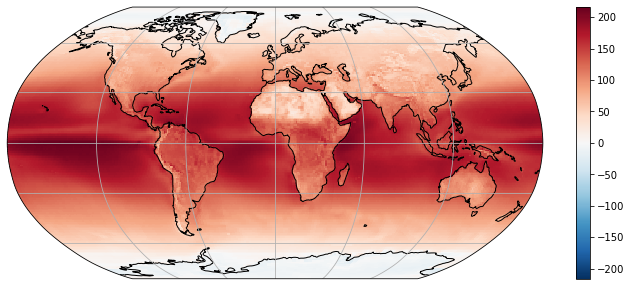

In [15]:
ax = plt.axes(projection=ccrs.Robinson())
net.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); 

In [16]:
print('Net radiative balance: {:.2f} W m-2'.format(float((net.mean(dim='lon') * weight).sum())))

Net radiative balance: 110.05 W m-2


Compute the global averages of each term and compare them to the values we discussed in the lecture ([ref](https://www.cgd.ucar.edu/staff/trenbert/trenberth.papers/BAMSmarTrenberth.pdf)). For reference, here is the figure again:

<img src="http://www.skepticalscience.com/pics/Figure1.png" width="50%">

In [17]:
print('SWdown: {:.2f} W m-2'.format(float((ds_mean.sfc_sw_down_all_clim.mean(dim='lon') * weight).sum())))
print('SWup: {:.2f} W m-2'.format(float((ds_mean.sfc_sw_up_all_clim.mean(dim='lon') * weight).sum())))
print('LWdown: {:.2f} W m-2'.format(float((ds_mean.sfc_lw_down_all_clim.mean(dim='lon') * weight).sum())))
print('LWup: {:.2f} W m-2'.format(float((ds_mean.sfc_lw_up_all_clim.mean(dim='lon') * weight).sum())))

SWdown: 186.78 W m-2
SWup: 23.18 W m-2
LWdown: 345.02 W m-2
LWup: 398.57 W m-2


**Discuss the processes that will counterbalance this net radiative energy imbalance, in the oceans and on land! Also discuss the differences between your results and the plot above.** (Careful literature search might lead you to more recent estimates of the budget if you are interested).

*Note about these values:* it appears that the CERES values are likely to be more accurate than the relatively old estimate from [Trenberth et al](https://www.cgd.ucar.edu/staff/trenbert/trenberth.papers/BAMSmarTrenberth.pdf). [This update](https://www.nature.com/articles/ngeo1580) for example shows values closer to ours. As a result of the larger downward LW flux, the SH and LH fluxes are also larger (~24 and ~88 W m$^{-2}$, respectively). As for the energy imbalance, [most recent estimates](https://essd.copernicus.org/articles/12/2013/2020/) indicate an imbalance or ~0.87 W m$^{-2}$ for the last decade, up from ~0.47 over the last 50 years.